### Define Functions & Import Packages

In [32]:
from pybaseball import statcast
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from pybaseball import statcast_sprint_speed
warnings.simplefilter(action='ignore', category=FutureWarning)


def get_existing_columns(df, columns):
    """Returns a list of columns that exist in the DataFrame."""
    return [col for col in columns if col in df.columns]


### Load in Data

In [ ]:
# Enable cache to avoid repeated downloads
from pybaseball import cache
cache.enable()

# Get Statcast data for a sample month
data = statcast(start_dt="2024-04-01", end_dt="2024-04-30")
data.head()


### Filter for singles and key features for now

In [ ]:
# Filter to singles only
singles = data[data['events'] == 'single']

# Keep useful columns
columns = [
    'player_name', 'player_id', 'events', 'launch_speed', 'launch_angle',
    'hit_distance_sc', 'hc_x', 'hc_y', 'hit_location', 'bb_type', 'spin_rate',
    'release_speed', 'pitch_type', 'stand',
    'fielder_8', 'fielder_8_x', 'fielder_8_y', 'fielder_9_x', 'fielder_9_y',
    'fielder_7_x', 'fielder_7_y', 'fielder_6_x', 'fielder_6_y',
    'inning', 'inning_topbot', 'outs_when_up', 'balls', 'strikes',
    'bat_score', 'fld_score',
    'on_1b', 'on_2b', 'on_3b',
    'home_team', 'away_team',
    'day_night', 'venue_id', 'game_date', 'game_type',
    'weather_temp', 'weather_wind', 'temp', 'wind_speed', 'wind_direction'
]

existing_cols = get_existing_columns(singles, columns)
singles_data = singles[existing_cols]

# Merge Sprint and Speed data 
# Load sprint speed data for the year
sprint = statcast_sprint_speed(2024)[['last_name, first_name', 'sprint_speed']]
sprint = sprint.rename(columns={'last_name, first_name': 'player_name'})


# Merge with singles on player_id
singles_data = singles_data.merge(sprint, on='player_name', how='left')

### Exploratory visualization

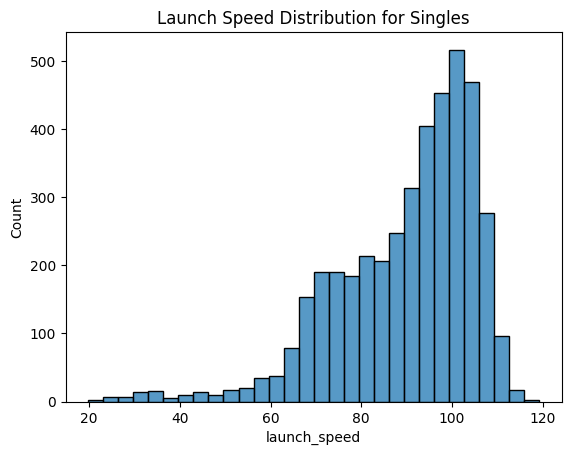

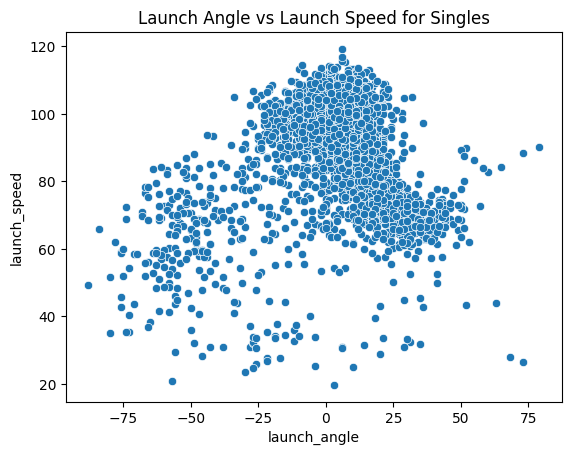

In [34]:
sns.histplot(singles_data['launch_speed'], bins=30)
plt.title('Launch Speed Distribution for Singles')
plt.show()

sns.scatterplot(x='launch_angle', y='launch_speed', data=singles_data)
plt.title('Launch Angle vs Launch Speed for Singles')
plt.show()
